In [1]:
# Import Dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt 
import glob 
import os

import csv



In [2]:
#import Data
path = "ParkingData/2018Data" 
all_files = glob.glob(path + "/*.csv")
li=[]

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

parking_data = pd.concat(li, axis=0, ignore_index=True)

parking_data = parking_data.round({"X": 3, "Y":3})
parking_data.head()


,X,Y,OBJECTID,ROWID_,DAY_OF_WEEK,HOLIDAY,WEEK_OF_YEAR,MONTH_OF_YEAR,ISSUE_TIME,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,BODY_STYLE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE
0,-77.009,38.873,5359102,NaN,NaN,NaN,NaN,NaN,NaN,P055,NO PARKING ANYTIME,UNIT BLOCK O ST SW EAST SIDE,DC,NaN,803554,3051.0,399176,133905,2018-11-01T20:20:00.000Z
1,-77.034,38.902,5359103,NaN,NaN,NaN,NaN,NaN,NaN,P039,PARK AT EXPIRED METER,900 BLOCK 15TH ST NW WEST SIDE,MD,NaN,800554,471.0,397082,137120,2018-11-30T14:16:00.000Z
2,-77.027,38.919,5359104,NaN,NaN,NaN,NaN,NaN,NaN,P007,PARK IN A BUS ZONE,2200 BLOCK 11TH ST NW WEST SIDE,MD,NaN,806747,5785.0,397655,138976,2018-11-30T23:35:00.000Z
3,-77.027,38.919,5359105,NaN,NaN,NaN,NaN,NaN,NaN,P170,FAILURE TO DISPLAY CURRENT TAGS,2200 BLOCK 11TH ST NW WEST SIDE,MD,NaN,806747,5785.0,397655,138976,2018-11-30T23:36:00.000Z
4,-77.038,38.906,5359106,NaN,NaN,NaN,NaN,NaN,NaN,P025,PARK LESS THAN 40 FEET FROM AN INTERSECTION,1200 BLOCK 17TH ST NW WEST SIDE,MO,NaN,800233,196.0,396661,137583,2018-11-21T15:43:00.000Z


In [3]:
len(parking_data)

1366116

In [4]:
state_total = parking_data["RP_PLATE_STATE"].unique()
state_total

array(['DC', 'MD', 'MO', 'VA', 'TX', 'FL', 'NJ', 'OR', 'MI', 'MA', 'NY',
       'CO', 'CT', 'IL', 'WV', 'MN', 'AZ', 'GA', 'OK', 'WI', 'TN', 'PA',
       'NC', 'VT', 'DE', 'IN', 'IA', 'SC', ' ', 'OH', 'NV', 'CA', 'WA',
       'RI', 'SD', 'AR', 'DP', 'MS', 'US', 'WY', 'NE', nan, 'KY', 'LA',
       'ME', 'AL', 'UT', 'YY', 'XX', 'KS', 'NH', 'AK', 'MT', 'ID', 'NM',
       'ON', 'HI', 'QC', 'ND', 'VI', 'NO', 'BC', 'IT', 'MB', 'PE', 'MM',
       'NS', 'PR', 'AB', 'SK', 'NU', 'YT', 'FM', 'EC', 'NB', 'UK', 'CN',
       'NT', 'XR', 'PQ'], dtype=object)

In [5]:
# Total number of violations by State Plate
Parking18 = parking_data.drop(parking_data[parking_data["RP_PLATE_STATE"] == " "].index)
Parking18 = parking_data.round({"X": 3, "Y":3})
state_total_clean = Parking18["RP_PLATE_STATE"].value_counts()
state_total_clean.head(15)

MD    486402
DC    386569
VA    325376
PA     17939
FL     15513
NY     13329
NC     13025
NJ     12301
TX      9156
GA      6457
OH      5338
MA      5183
CA      5056
IL      4293
SC      4140
Name: RP_PLATE_STATE, dtype: int64

In [6]:
#Find plates only within the DC, MD & VA
ParkingParking18["RP_PLATE_STATE"] == "DC") | (Parking18["RP_PLATE_STATE"] == "MD") |
                           (Parking18["RP_PLATE_STATE"] == "VA")
Parking18_dmv = Parking18.loc[(Parking18["RP_PLATE_STATE"] == "DC") | (Parking18["RP_PLATE_STATE"] == "MD") |
                           (Parking18["RP_PLATE_STATE"] == "VA") | :]
 
Parking18_dmv.head()


,X,Y,OBJECTID,ROWID_,DAY_OF_WEEK,HOLIDAY,WEEK_OF_YEAR,MONTH_OF_YEAR,ISSUE_TIME,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,BODY_STYLE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE
0,-77.009,38.873,5359102,NaN,NaN,NaN,NaN,NaN,NaN,P055,NO PARKING ANYTIME,UNIT BLOCK O ST SW EAST SIDE,DC,NaN,803554,3051.0,399176,133905,2018-11-01T20:20:00.000Z
1,-77.034,38.902,5359103,NaN,NaN,NaN,NaN,NaN,NaN,P039,PARK AT EXPIRED METER,900 BLOCK 15TH ST NW WEST SIDE,MD,NaN,800554,471.0,397082,137120,2018-11-30T14:16:00.000Z
2,-77.027,38.919,5359104,NaN,NaN,NaN,NaN,NaN,NaN,P007,PARK IN A BUS ZONE,2200 BLOCK 11TH ST NW WEST SIDE,MD,NaN,806747,5785.0,397655,138976,2018-11-30T23:35:00.000Z
3,-77.027,38.919,5359105,NaN,NaN,NaN,NaN,NaN,NaN,P170,FAILURE TO DISPLAY CURRENT TAGS,2200 BLOCK 11TH ST NW WEST SIDE,MD,NaN,806747,5785.0,397655,138976,2018-11-30T23:36:00.000Z
5,-77.036,38.906,5359107,NaN,NaN,NaN,NaN,NaN,NaN,P039,PARK AT EXPIRED METER,1600 BLOCK M ST NW NORTH SIDE,MD,NaN,803647,3266.0,396916,137533,2018-11-21T14:50:00.000Z


In [7]:
Parking18_no_dmv = Parking18.drop(Parking18[(Parking18["RP_PLATE_STATE"] == "DC") | (Parking18["RP_PLATE_STATE"] == "MD") | 
                                            (Parking18["RP_PLATE_STATE"] == "VA")].index)
Parking18_no_dmv.head()


,X,Y,OBJECTID,ROWID_,DAY_OF_WEEK,HOLIDAY,WEEK_OF_YEAR,MONTH_OF_YEAR,ISSUE_TIME,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,BODY_STYLE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE
4,-77.038,38.906,5359106,NaN,NaN,NaN,NaN,NaN,NaN,P025,PARK LESS THAN 40 FEET FROM AN INTERSECTION,1200 BLOCK 17TH ST NW WEST SIDE,MO,NaN,800233,196.0,396661,137583,2018-11-21T15:43:00.000Z
28,-77.049,38.909,5361184,NaN,NaN,NaN,NaN,NaN,NaN,P076,NaN,1500 BLOCK 22ND ST NW EAST SIDE,TX,NaN,814055,12110.0,395768,137917,2018-11-05T00:20:00.000Z
30,-77.048,38.905,5361186,NaN,NaN,NaN,NaN,NaN,NaN,P259,NO STOPPING OR STANDING IN PM RUSH HOUR ZONE,2100 BLOCK M ST NW SOUTH SIDE,FL,NaN,801608,1366.0,395824,137491,2018-11-09T16:32:00.000Z
43,-77.031,38.936,5361199,NaN,NaN,NaN,NaN,NaN,NaN,P076,NaN,3500 BLOCK HOLMEAD PL NW NORTH S*,NJ,NaN,801654,1556.0,397324,140851,2018-11-05T01:18:00.000Z
50,-77.034,38.900,5361206,NaN,NaN,NaN,NaN,NaN,NaN,P281,FAIL TO DISPLAY A MULTISPACE METER RECEIPT,1500 BLOCK H ST NW NORTH SIDE,OR,NaN,808289,7099.0,397017,136929,2018-11-07T15:20:00.000Z


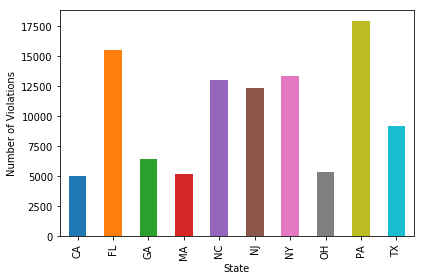

In [8]:
Parking_top10 = Parking18_no_dmv.loc[(Parking18_no_dmv["RP_PLATE_STATE"] == "PA") | (Parking18_no_dmv["RP_PLATE_STATE"] == "FL") |
                           (Parking18_no_dmv["RP_PLATE_STATE"] == "NC") | (Parking18_no_dmv["RP_PLATE_STATE"] == "NJ") | (Parking18_no_dmv["RP_PLATE_STATE"] == "TX") |
                           (Parking18_no_dmv["RP_PLATE_STATE"] == "NY") | (Parking18_no_dmv["RP_PLATE_STATE"] == "GA") | (Parking18_no_dmv["RP_PLATE_STATE"] == "OH") |
                           (Parking18_no_dmv["RP_PLATE_STATE"] == "MA") | (Parking18_no_dmv["RP_PLATE_STATE"] == "CA"), :]


top10 = Parking_top10.groupby(["RP_PLATE_STATE"])
top10new = top10["OBJECTID"].count()

x = ["CA", "FL", "GA", "MA", "NC", "NJ", "NY", "OH", "PA", "TX"]
top10chart = top10new.plot(kind="bar")
top10chart.set_xlabel("State")
top10chart.set_ylabel("Number of Violations")

#top10chart.xticks(x, rotation="90")
plt.tight_layout()
plt.show()





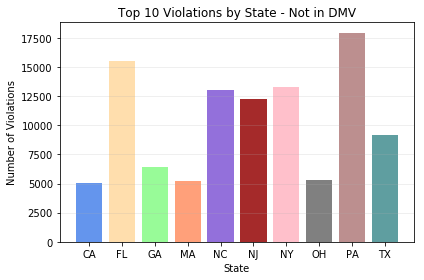

In [18]:
ax = plt.axes()
ax.yaxis.grid(alpha = .25)

plt.bar(x, top10new, color = ("cornflowerblue", "navajowhite", "palegreen", "lightsalmon", "mediumpurple", "brown", "pink", "grey", "rosybrown", "cadetblue"))
plt.xlabel("State")
plt.ylabel("Number of Violations")
plt.title("Top 10 Violations by State - Not in DMV")

plt.tight_layout()


plt.savefig("Output/Top10DMV", dpi=500)


In [19]:
Parking18_dmv
top_dmv = Parking18_dmv.groupby(["RP_PLATE_STATE"])
top_dmv = top_dmv["OBJECTID"].count()
top_dmv

RP_PLATE_STATE
DC    386569
MD    486402
VA    325376
Name: OBJECTID, dtype: int64

In [ ]:
len(parking_data) - len(Parking18_dmv)

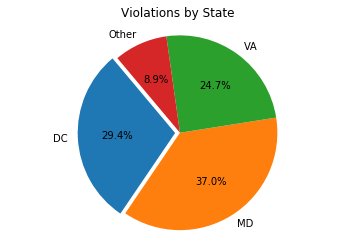

In [30]:
sizes = [386569, 486402, 325376, 116769]
labels = 'DC', 'MD', 'VA', "Other"
explode = (0.05, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=130)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Violations by State")

plt.savefig("Output/TopDMV", dpi=500)

1198347

167769